# Generate template for PELE's side chain perturbation
This example shows how to generate a template with `offpele` for `PELE`'s `side chain perturbation` workflow.

In [1]:
from offpele.topology import Molecule, RotamerLibrary
from offpele.template import Impact
from offpele.utils import get_data_file_path

## Exclude terminal rotamers

In [2]:
ligand_path = get_data_file_path('ligands/modified_sidechain.pdb')
molecule = Molecule(ligand_path, tag='GRW',
                    core_constraints=[' CA ', ' C  ', ' N  '],
                    exclude_terminal_rotamers=True)

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'modified_sidechain'
   - Representing molecule with the Open Force Field Toolkit


 - Generating rotamer library
   - Core forced to contain atoms: CA, C, N


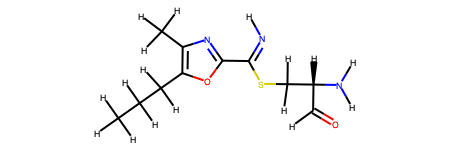

In [3]:
display(molecule)

In [4]:
rotamer_library = RotamerLibrary(molecule)

In [5]:
rotamer_library.to_file(molecule.tag.upper() + '.rot.assign')

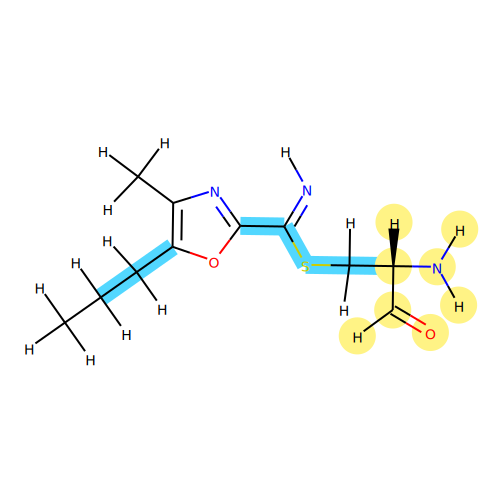

In [6]:
display(rotamer_library)

In [7]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml')

 - Loading forcefield
 - Computing partial charges with am1bcc


In [8]:
impact_template = Impact(molecule)

In [9]:
impact_template.write(molecule.tag.lower() + 'z')

## Include terminal rotamers

In [10]:
ligand_path = get_data_file_path('ligands/modified_sidechain.pdb')
molecule = Molecule(ligand_path, tag='GRW',
                    core_constraints=[' CA ', ' C  ', ' N  '],
                    exclude_terminal_rotamers=False)

 - Initializing molecule from PDB
   - Loading molecule from RDKit
   - Assigning stereochemistry from 3D coordinates
   - Setting molecule name to 'modified_sidechain'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core forced to contain atoms: CA, C, N


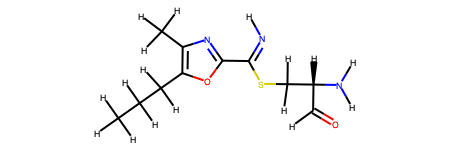

In [11]:
display(molecule)

In [12]:
rotamer_library = RotamerLibrary(molecule)

In [13]:
rotamer_library.to_file(molecule.tag.upper() + '.rot.assign_2')

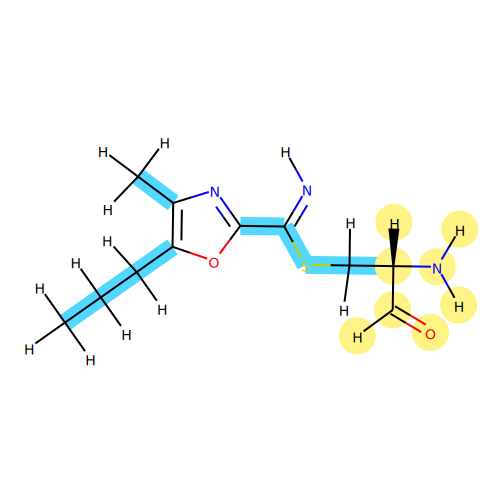

In [14]:
display(rotamer_library)

In [ ]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml')

 - Loading forcefield
 - Computing partial charges with am1bcc


In [ ]:
impact_template = Impact(molecule)

In [ ]:
impact_template.write(molecule.tag.lower() + 'z')